# Nicaviz Demo

_By Nicapotato_

In [1]:
%reload_ext autoreload
%autoreload 2
%load_ext watermark

In [2]:
import pandas as pd
import numpy as np
from numpy import random
import nicaviz
import seaborn as sns
import time

notebookstart = time.time()

sns.set_style("whitegrid")

%watermark 
%watermark --iversions

Last updated: 2022-10-05T17:12:50.065058+01:00

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.13.0

Compiler    : Clang 4.0.1 (tags/RELEASE_401/final)
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit

numpy  : 1.21.5
pandas : 1.2.3
nicaviz: 0.1.3
seaborn: 0.10.1



In [3]:
def random_dates(start, end, n=10):

    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

DFLEN = 5000
df = pd.DataFrame({
    'int_small': random.randint(low=0, high=5, size=DFLEN),
    'int_med': random.randint(low=0, high=20, size=DFLEN),
    'str_med': random.choice(["a","b","c","d","e","f","g"], size=DFLEN),
    'str_med_two': random.choice([x for x in "qwerty"], size=DFLEN),
    'str_small': random.choice(["blue","red"], size=DFLEN),
    'bool': random.choice([True,False], size=DFLEN),
    'cont_rand': random.random(size=DFLEN)*10,
    'cont_uni': random.normal(loc=0, scale=1, size=DFLEN)*10,
    'date': pd.date_range(start='1/1/2018', periods=DFLEN),
    'timestamp': random_dates(pd.to_datetime('2018-01-01'), pd.to_datetime('2018-03-01'), n=DFLEN)
    })

display(df.sample(10))

,int_small,int_med,str_med,str_med_two,str_small,bool,cont_rand,cont_uni,date,timestamp
3094,3,16,e,t,red,False,5.984111,-3.045346,2026-06-22,2018-02-15 22:23:02
3295,1,9,d,y,blue,False,8.580609,-2.029114,2027-01-09,2018-01-05 00:30:12
3429,3,18,e,y,red,False,7.501221,-15.861362,2027-05-23,2018-02-07 19:19:53
3468,3,17,b,r,red,False,3.387438,1.663300,2027-07-01,2018-01-22 09:35:03
2717,1,6,e,t,blue,True,7.707231,-3.013037,2025-06-10,2018-02-20 08:20:16
420,4,2,g,y,red,False,4.607593,10.412399,2019-02-25,2018-01-28 14:21:46
3940,2,10,a,w,red,False,6.129093,14.434165,2028-10-15,2018-02-23 19:15:37
3639,1,11,c,r,red,True,5.895388,2.852341,2027-12-19,2018-02-18 07:49:36
1808,4,2,f,e,red,False,7.152977,19.313842,2022-12-14,2018-02-11 11:43:08
2483,2,9,f,e,blue,False,9.160177,5.843544,2024-10-19,2018-02-06 12:04:26


In [4]:
df.head()

,int_small,int_med,str_med,str_med_two,str_small,bool,cont_rand,cont_uni,date,timestamp
0,1,8,b,w,blue,True,3.018349,7.735734,2018-01-01,2018-02-04 21:46:16
1,3,3,a,r,red,False,9.382818,-6.271420,2018-01-02,2018-01-23 06:19:19
2,2,18,g,w,blue,False,0.157641,7.855669,2018-01-03,2018-01-24 14:50:17
3,4,12,e,e,red,True,5.660072,7.559129,2018-01-04,2018-02-06 13:04:30
4,0,19,g,y,blue,False,6.531234,-9.506122,2018-01-05,2018-02-13 03:03:18


In [5]:
df.nica.categorical_describe()

Dataframe Dimension: 5000 Rows, 10 Columns


,Unique,Missing,dtype,ValCount 1,Occ,ValCount 2,Occ,ValCount 3,Occ,ValCount 4,Occ,ValCount 5,Occ
Column,,,,,,,,,,,,,
int_small,5,0,int64,4,1035,3,1019,2,1018.0,1,977.0,0,951.0
int_med,20,0,int64,16,278,10,275,1,275.0,8,261.0,5,261.0
str_med,7,0,object,g,737,f,726,c,725.0,d,715.0,e,707.0
str_med_two,6,0,object,y,896,e,862,t,840.0,r,822.0,q,815.0
str_small,2,0,object,red,2579,blue,2421,NaN,NaN,NaN,NaN,NaN,NaN
bool,2,0,bool,False,2519,True,2481,NaN,NaN,NaN,NaN,NaN,NaN
cont_rand,5000,0,float64,8.961377,1,4.698371,1,0.958294,1.0,7.487447,1.0,4.467974,1.0
cont_uni,5000,0,float64,-11.590608,1,1.28698,1,6.633103,1.0,10.689418,1.0,3.119245,1.0
date,5000,0,datetime64[ns],2026-04-30 00:00:00,1,2020-10-31 00:00:00,1,2021-09-28 00:00:00,1.0,2030-04-04 00:00:00,1.0,2025-12-02 00:00:00,1.0


In [6]:
with nicaviz.timer("Reduce Memory"):
    df, na_list = nicaviz.reduce_mem_usage(df)

DF Memory Before  :            0.35 MB
DF Memory After   :            0.24 MB
Reduced by        :           30.13 %

Numeric Columns with NAN replaced with -1:
[]
[Reduce Memory] done in 0.0 s


In [7]:
df.nica.categorical_describe()

Dataframe Dimension: 5000 Rows, 10 Columns


,Unique,Missing,dtype,ValCount 1,Occ,ValCount 2,Occ,ValCount 3,Occ,ValCount 4,Occ,ValCount 5,Occ
Column,,,,,,,,,,,,,
int_small,5,0,uint8,4,1035,3,1019,2,1018.0,1,977.0,0,951.0
int_med,20,0,uint8,16,278,10,275,1,275.0,8,261.0,5,261.0
str_med,7,0,object,g,737,f,726,c,725.0,d,715.0,e,707.0
str_med_two,6,0,object,y,896,e,862,t,840.0,r,822.0,q,815.0
str_small,2,0,object,red,2579,blue,2421,NaN,NaN,NaN,NaN,NaN,NaN
bool,2,0,bool,False,2519,True,2481,NaN,NaN,NaN,NaN,NaN,NaN
cont_rand,5000,0,float32,0.1229,1,2.258742,1,6.516443,1.0,1.974174,1.0,9.075487,1.0
cont_uni,5000,0,float32,19.133945,1,5.042698,1,18.478413,1.0,-9.875546,1.0,-15.592794,1.0
date,5000,0,datetime64[ns],2026-04-30 00:00:00,1,2020-10-31 00:00:00,1,2021-09-28 00:00:00,1.0,2030-04-04 00:00:00,1.0,2025-12-02 00:00:00,1.0


[Count Plot] done in 0.0 s


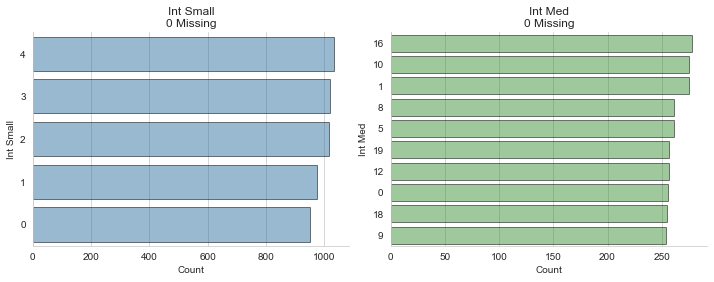

In [8]:
with nicaviz.timer("Count Plot"):
    df.nica.mass_plot(
        plt_set= ["int_small", "int_med"],
        plottype = "countplot")

[Bar Plot] done in 0.0 s


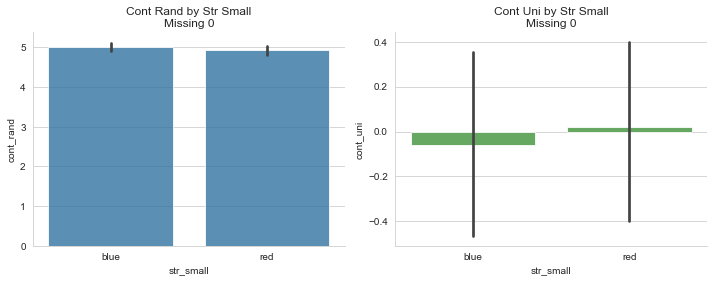

In [9]:
with nicaviz.timer("Bar Plot"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        x_var = "str_small",
        plottype = "bar")

[Boxplots] done in 0.0 s


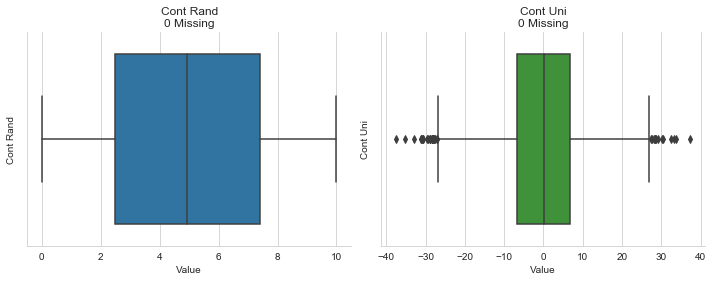

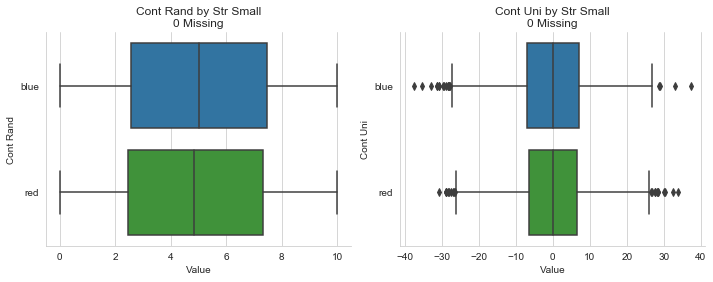

In [10]:
with nicaviz.timer("Boxplots"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        plottype = "boxplot")

    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        hue = "str_small",
        plottype = "boxplot")

[Distplots] done in 0.0 s


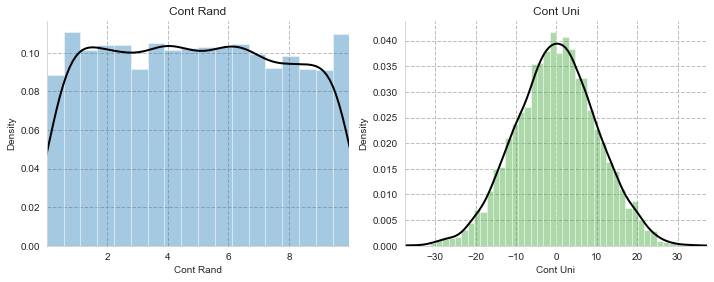

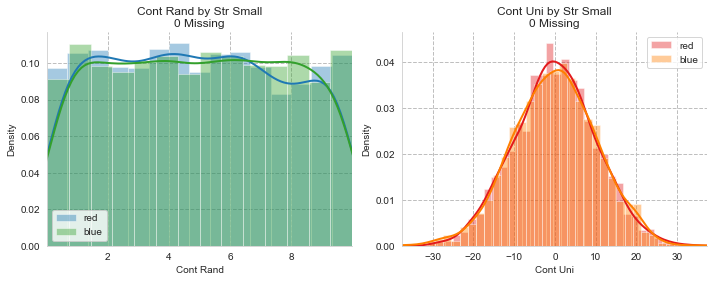

In [11]:
with nicaviz.timer("Distplots"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        plottype = "distplot")

    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        hue = "str_small",
        plottype = "distplot")

[Distplots] done in 0.0 s


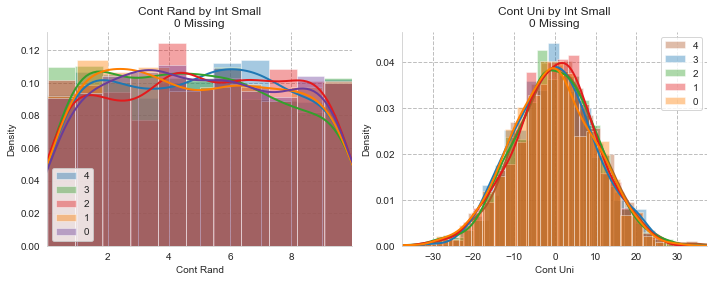

In [12]:
with nicaviz.timer("Distplots"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        hue = "int_small",
        plottype = "distplot")

[Countplot] done in 0.0 s


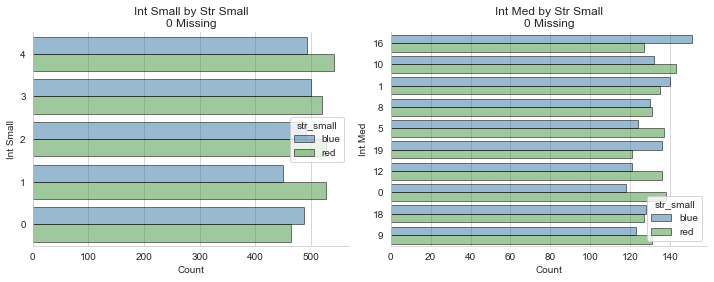

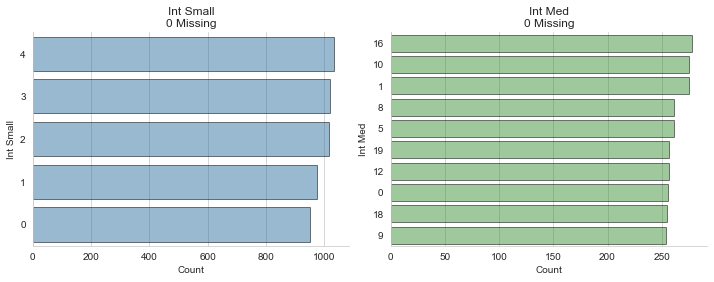

In [13]:
with nicaviz.timer("Countplot"):
    df.nica.mass_plot(
        plt_set= ["int_small", "int_med"],
        hue = "str_small",
        plottype = "countplot")

    df.nica.mass_plot(
        plt_set= ["int_small", "int_med"],
        plottype = "countplot")

### Time Series

[Timeserie Resample Plot] done in 0.0 s


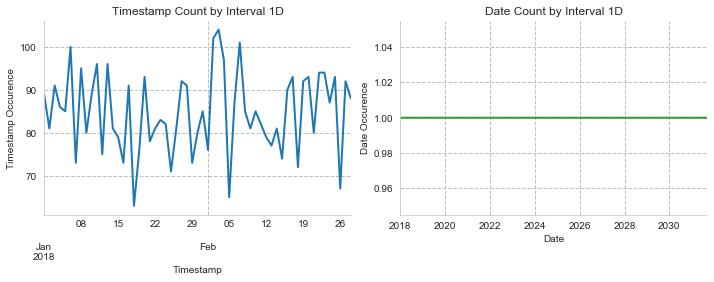

In [14]:
with nicaviz.timer("Timeserie Resample Plot"):
    df.nica.mass_plot(
        plt_set= ["timestamp", "date"],
        plottype = "ts_resample",
        resample=True,
        resample_interval="1D"
    )

[Timeserie Resample Plot] done in 0.0 s


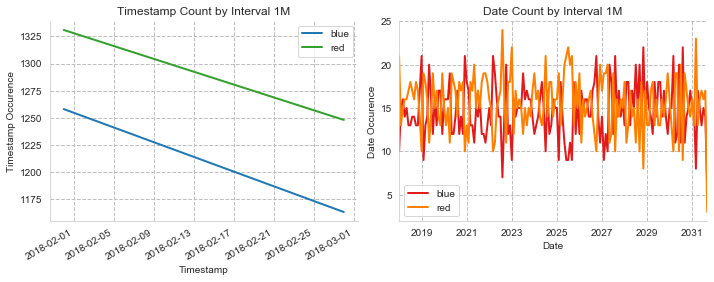

In [15]:
with nicaviz.timer("Timeserie Resample Plot"):
    df.nica.mass_plot(
        plt_set= ["timestamp", "date"],
        plottype = "ts_resample",
        resample=True,
        hue = "str_small",
        resample_interval="1M"
    )

[Timeserie Rolling Plot] done in 0.0 s


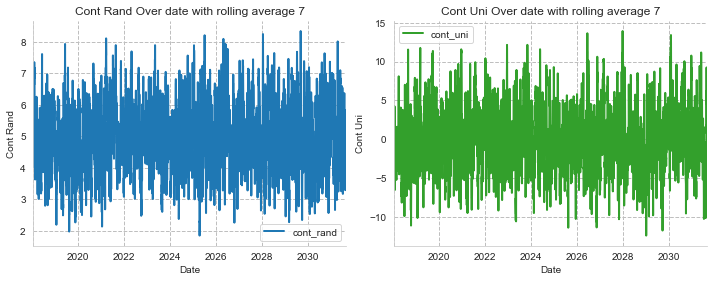

In [16]:
with nicaviz.timer("Timeserie Rolling Plot"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        plottype = "ts_rolling",
        x_var="date",
        rolling=True,
        r=7
    )

[Timeserie Rolling Plot] done in 0.0 s


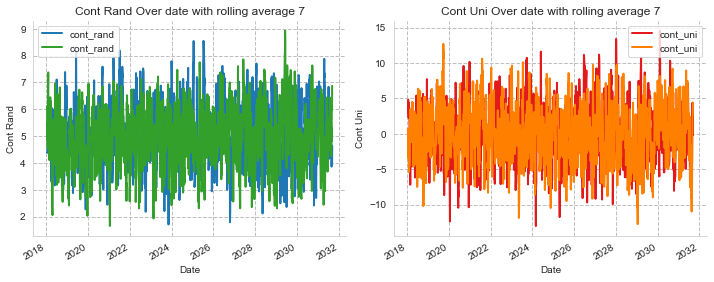

In [17]:
with nicaviz.timer("Timeserie Rolling Plot"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        plottype = "ts_rolling",
        hue = "str_small",
        x_var="date",
        rolling=True,
        r=7
    )

### WordClouds

[Wordcloud Plot] done in 0.0 s


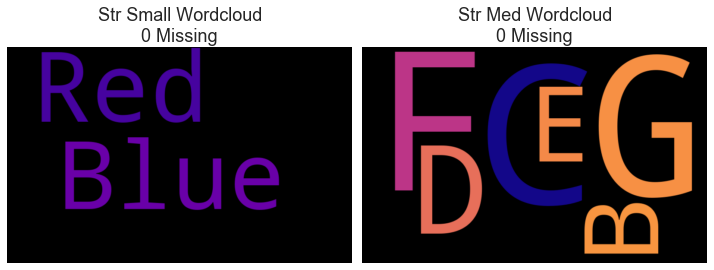

In [18]:
with nicaviz.timer("Wordcloud Plot"):
    df.nica.mass_plot(
        plt_set= ["str_small", "str_med"],
        plottype = "wordcloud")

### Rank Correlations

[Correlation Plot] done in 4.0 s


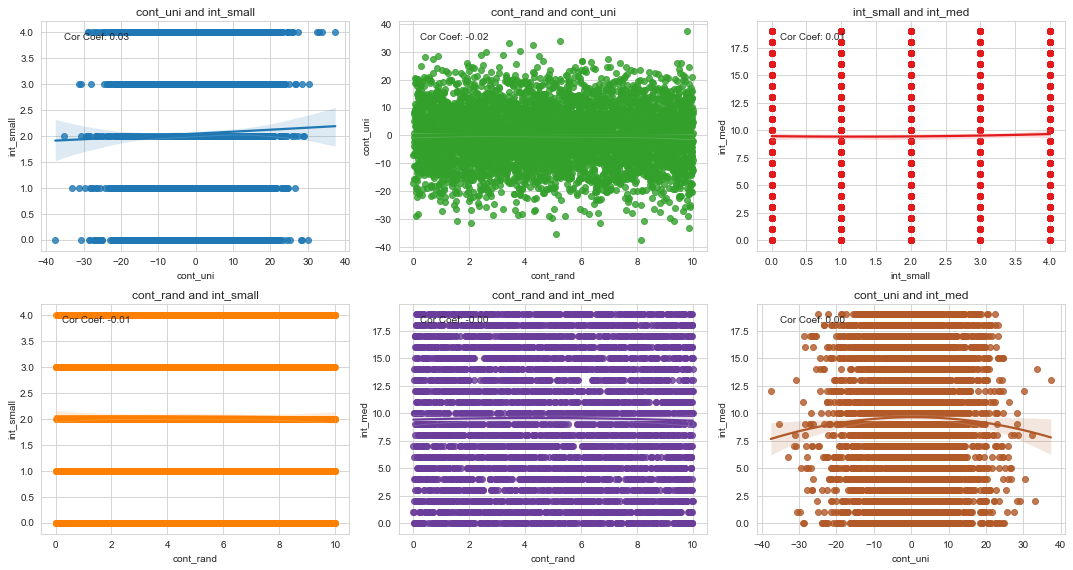

In [19]:
with nicaviz.timer("Correlation Plot"):
    df.nica.rank_correlations_plots(["cont_rand", "cont_uni", "int_small", "int_med"], 9)

### Pivot Heatmaps

[Pivot Heatmap Plot] done in 9.0 s


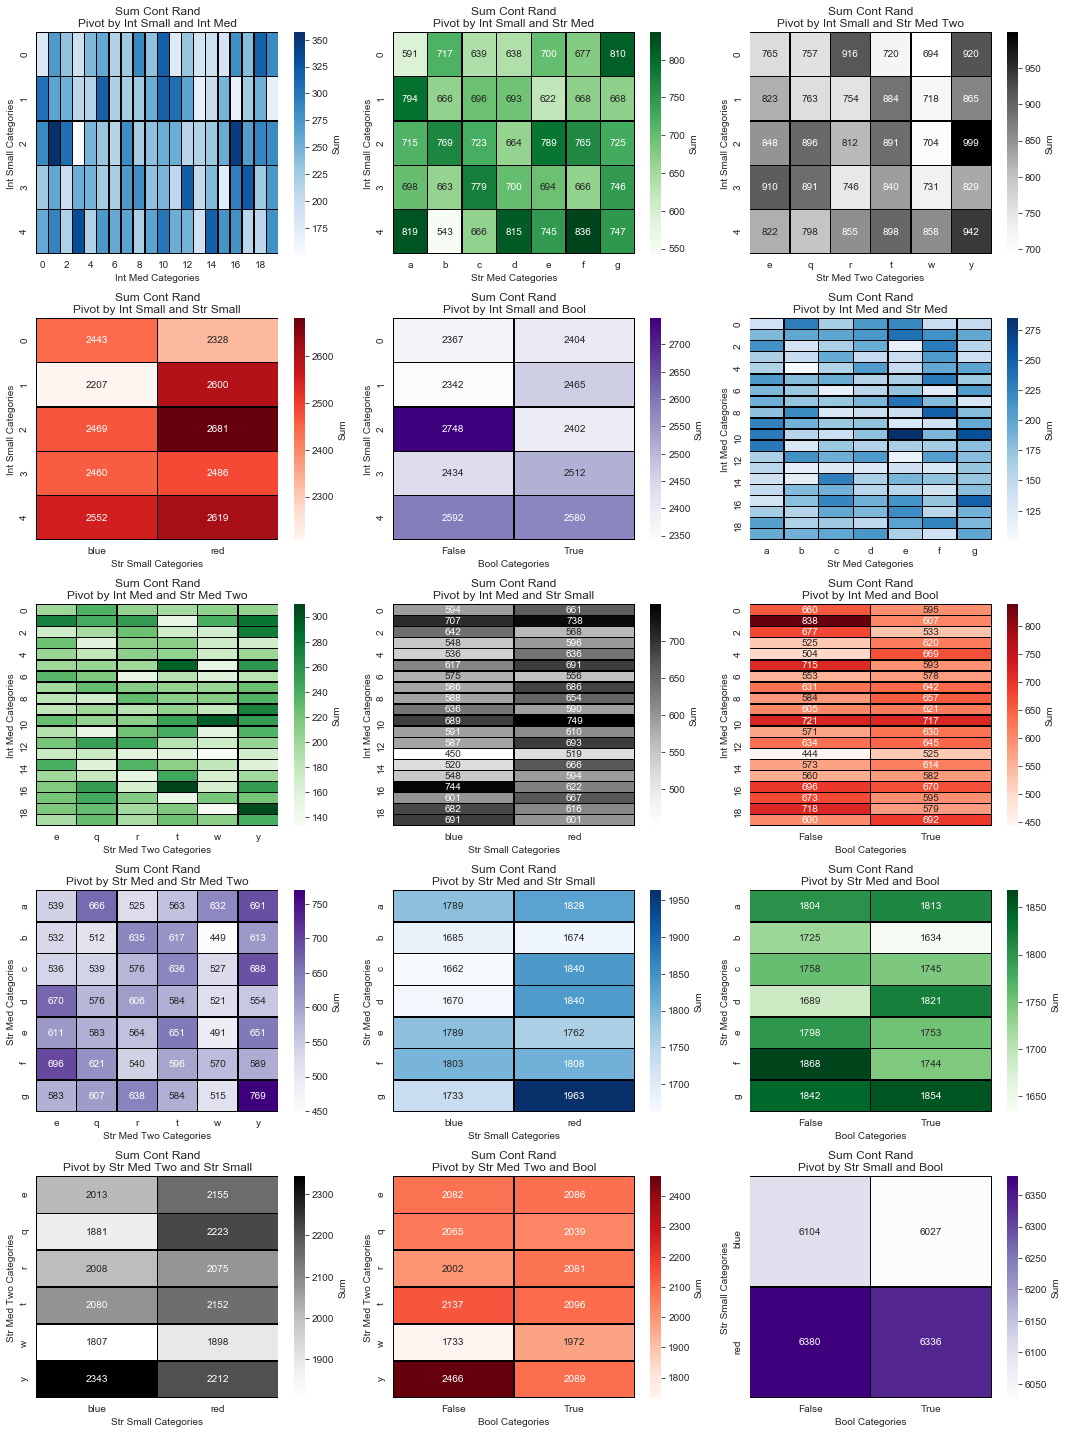

In [20]:
with nicaviz.timer("Pivot Heatmap Plot"):
    categorical = ['int_small', 'int_med', 'str_med', 'str_med_two', 'str_small', 'bool']
    df.nica.pivot_plots(categorical, "cont_rand", np.sum)

[Pivot Heatmap Plot] done in 8.0 s


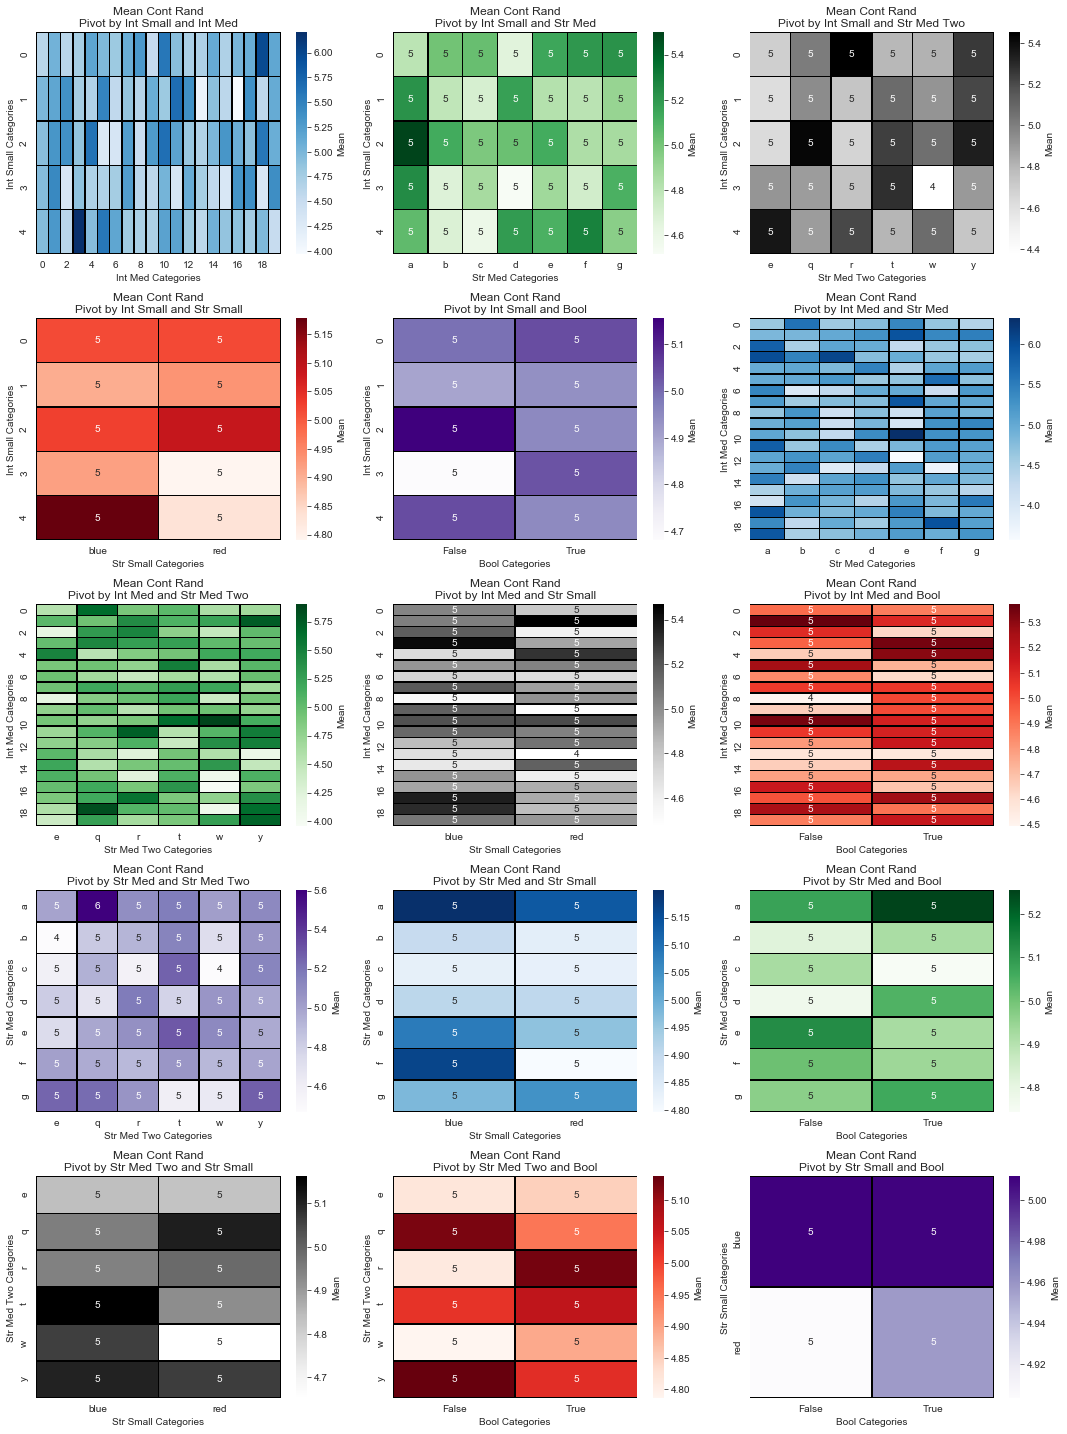

In [21]:
with nicaviz.timer("Pivot Heatmap Plot"):
    df.nica.pivot_plots(categorical, "cont_rand", np.mean)

In [22]:
print("Notebook Runtime: %0.2f Minutes"%((time.time() - notebookstart)/60))

Notebook Runtime: 0.62 Minutes
